In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [161]:
df = pd.read_csv('itd_17_21.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.date = pd.to_datetime(df.date).dt.to_period('M')
# df = df[df.date < '2021-03']

df1 = pd.read_csv('transfer_order_17_21.csv')
df1.sales_order_date = pd.to_datetime(df1.sales_order_date, format='%d-%m-%Y')
df1.sales_order_date = pd.to_datetime(df1.sales_order_date).dt.to_period('M')
# df1 = df1[df1.sales_order_date < '2021-03']

def corrn(c):
    a=df[df.country==c]
    itd = a.groupby('date')['sales_after_discount'].sum().reset_index()
    itd.rename(columns={'sales_after_discount':'itd'}, inplace=True) # rename to 'itd'
    a=df1[df1.country==c]
    to = a.groupby('sales_order_date')['value_in_base_currency'].sum().reset_index() # rename to 'transfer_order'
    to.rename(columns={'value_in_base_currency':'transfer_order'},inplace=True)
    
    
    
    if itd.shape[0] > to.shape[0]:
        print('itd > to')
        diff = itd.shape[0] - to.shape[0]
        for i in range(diff):
            itd.drop(itd.last_valid_index(), inplace=True)
    elif to.shape[0] > itd.shape[0]:

        diff = to.shape[0]-itd.shape[0]
        for i in range(diff):
            to.drop(to.last_valid_index(), inplace=True)

    
    e = (to.transfer_order.sum()/itd.itd.sum())*100
    k = to.transfer_order
    g = itd.itd
    
    m, b, r, p, se = stats.linregress(k,g)
    z = stats.spearmanr(k,g)
    
    if m > 0:
        res2 = 'Positive'
    else:
        res2 = 'Negative'
        
    if z[1] > 0.5:
        res = 'NO'
    else:
        res = 'YES'
        
#     if z[0] > 0.19:
#         res1 = 'YES'
#     else:
#         res1 = 'NO'

    return e.round(1), res2, z[0].round(1), res

In [162]:
corrn('Thailand')

(19.5, 'Positive', 0.2, 'YES')

In [164]:
d={}
m = []
c = ['Singapore','Malaysia','Vietnam','Philippines','Thailand','Indonesia']
for i in c:
    b, s, sp, p = corrn(i)
    d={'Country':i, 'Transfer Order %': b, 'Coefficient':s, 'Strength Of Correlation': sp,\
       'Effect Of Transfer Order On ITD Qty?':p}
    m.append(d)
total = pd.DataFrame(m)
total

,Country,Transfer Order %,Coefficient,Strength Of Correlation,Effect Of Transfer Order On ITD Qty?
0,Singapore,16.3,Positive,0.2,YES
1,Malaysia,73.1,Positive,0.4,YES
2,Vietnam,4.8,Positive,0.3,YES
3,Philippines,26.2,Negative,0.1,NO
4,Thailand,19.5,Positive,0.2,YES
5,Indonesia,23.0,Positive,0.1,NO


In [165]:
total.sort_values('Strength Of Correlation', ascending=False)

,Country,Transfer Order %,Coefficient,Strength Of Correlation,Effect Of Transfer Order On ITD Qty?
1,Malaysia,73.1,Positive,0.4,YES
2,Vietnam,4.8,Positive,0.3,YES
0,Singapore,16.3,Positive,0.2,YES
4,Thailand,19.5,Positive,0.2,YES
3,Philippines,26.2,Negative,0.1,NO
5,Indonesia,23.0,Positive,0.1,NO


## Double checking

In [71]:
v = pd.read_csv('itd_17_21.csv')
v.date = pd.to_datetime(v.date, format='%Y-%m-%d')
v.date = pd.to_datetime(v.date).dt.to_period('M')


v=v[v.country=='Singapore']
itd = v.groupby('date')['sales_after_discount'].sum().reset_index()
itd = itd.reset_index(drop=True)
itd.rename(columns={'sales_after_discount':'itd'}, inplace=True)

In [101]:
t = pd.read_csv('transfer_order_17_21.csv')
t.sales_order_date = pd.to_datetime(t.sales_order_date, format='%d-%m-%Y')
t.sales_order_date = pd.to_datetime(t.sales_order_date).dt.to_period('M')


t=t[t.country=='Singapore']
to = t.groupby('sales_order_date')['value_in_base_currency'].sum().reset_index()
to = to.reset_index(drop=True)
to.rename(columns={'value_in_base_currency':'transfer_order'},inplace=True)

    
if itd.shape[0] > to.shape[0]:
    print('itd > to')
    diff = itd.shape[0] - to.shape[0]
    for i in range(diff):
        itd.drop(itd.last_valid_index(), inplace=True)
elif to.shape[0] > itd.shape[0]:
    print('to > itd')
    diff = to.shape[0]-itd.shape[0]
    for i in range(diff):
        to.drop(to.last_valid_index(), inplace=True)

to > itd


In [102]:
w = itd.itd
p = to.transfer_order

In [103]:
m = stats.linregress(p,w)

In [104]:
m

LinregressResult(slope=-0.5773473666045814, intercept=210702.23547578233, rvalue=-0.030753911714304614, pvalue=0.8447897627366244, stderr=2.9304844543865127, intercept_stderr=69801.6907944261)

In [105]:
z = stats.spearmanr(p,w)

In [106]:
z

SpearmanrResult(correlation=-0.09679855028692239, pvalue=0.5369055701540663)

In [143]:
df = pd.read_csv('itd_17_21.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.date = pd.to_datetime(df.date).dt.to_period('M')
# df = df[df.date < '2021-03']

df1 = pd.read_csv('transfer_order_17_21.csv')
df1.sales_order_date = pd.to_datetime(df1.sales_order_date, format='%d-%m-%Y')
df1.sales_order_date = pd.to_datetime(df1.sales_order_date).dt.to_period('M')
# df1 = df1[df1.sales_order_date < '2021-03']

def plot_corr(c):
    a=df[df.country==c]
    itd = a.groupby('date')['sales_after_discount'].sum().reset_index()
    itd.rename(columns={'sales_after_discount':'itd'}, inplace=True) # rename to 'itd'
    a=df1[df1.country==c]
    to = a.groupby('sales_order_date')['value_in_base_currency'].sum().reset_index() # rename to 'transfer_order'
    to.rename(columns={'value_in_base_currency':'transfer_order'},inplace=True)
    
    
    
    if itd.shape[0] > to.shape[0]:
        print('itd > to')
        diff = itd.shape[0] - to.shape[0]
        for i in range(diff):
            itd.drop(itd.last_valid_index(), inplace=True)
    elif to.shape[0] > itd.shape[0]:

        diff = to.shape[0]-itd.shape[0]
        for i in range(diff):
            to.drop(to.last_valid_index(), inplace=True)

    
#     e = to.transfer_order.sum()/itd.itd.sum()
    k = to.transfer_order
    g = itd.itd
    
    plf = pd.DataFrame({'to':k, 'itd': g})
    sns.lmplot(data=plf, x='to', y='itd', size=6)


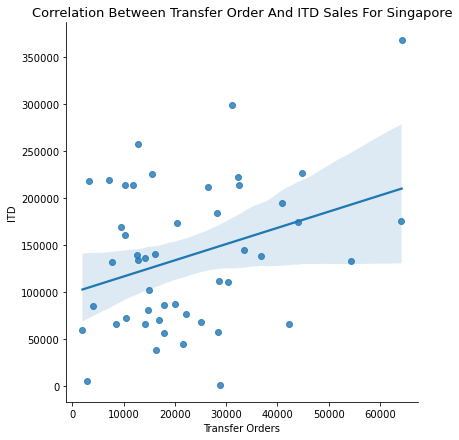

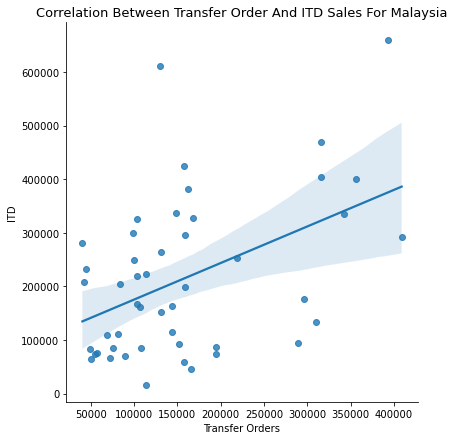

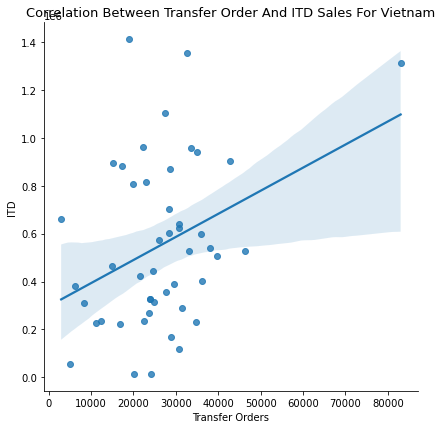

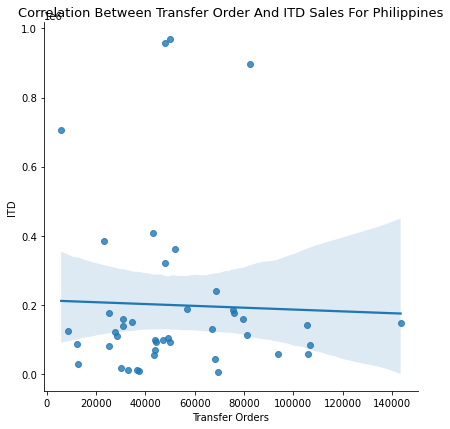

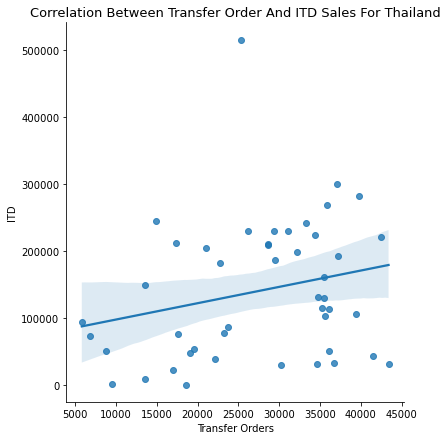

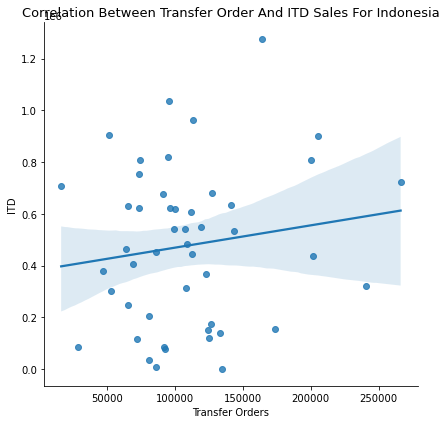

In [148]:
c = ['Singapore','Malaysia','Vietnam','Philippines','Thailand','Indonesia']

for i in c:
    plot_corr(i)
    plt.xlabel('Transfer Orders')
    plt.ylabel('ITD')
    plt.title(f'Correlation Between Transfer Order And ITD Sales For {i}', fontsize=13)

plt.tight_layout()
plt.show()